# Building a Linear Regression model to predict property prices
1. Explore the Data:
- Load the dataset, inspect basic information, and handle any missing values
(if present).
- Visualize the relationships between the independent variables (`Bedrooms`,
`Bathrooms`, `Floor_no`, `Floor_area`, `City`) and the dependent variable
(`Price_in_taka`).
2. Build the Linear Regression Model:
- Create a linear regression model to predict the property price
(`Price_in_taka`) based on features like the number of bedrooms, bathrooms,
floor area, floor number, and city.
- Split the dataset into two parts: a training set and a testing set (80/20 split).
- Train the model on the training set.
3. Evaluate the Model:
- Predict the property prices on the testing set.

- Calculate and present evaluation metrics such as Mean Squared Error
(MSE), Root Mean Squared Error (RMSE), and R-squared.
4. Improve the Model (if necessary):
- Experiment with different independent variables or combinations of
variables.
5. Deploy the Model:
- Create a function that takes input parameters like the number of bedrooms,
bathrooms, floor number, floor area, and city, and returns the predicted property
price.

### 1. Explore the Data:

In [321]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [322]:
# Tải dữ liệu vào dataframe
df = pd.read_csv("D:/Machine Learning/Dataset/LN_house_price_bd.csv")

In [323]:
# Hiển thị 5 dòng đầu của dữ liệu
df.head()

,Title,Bedrooms,Bathrooms,Floor_no,Occupancy_status,Floor_area,City,Price_in_taka,Location
0,We Are Offering You A Very Spacious 1960 Sq Ft...,3.0,4.0,3,vacant,1960.0,dhaka,"৳39,000,000","Gulshan 1, Gulshan"
1,Valuable 1705 Square Feet Apartment Is Ready T...,3.0,3.0,1,vacant,1705.0,dhaka,"৳16,900,000","Lake Circus Road, Kalabagan"
2,1370 square feet apartment is ready to sale in...,3.0,3.0,6,vacant,1370.0,dhaka,"৳12,500,000","Shukrabad, Dhanmondi"
3,2125 Square Feet Apartment For Sale In Bashund...,3.0,3.0,4,vacant,2125.0,dhaka,"৳20,000,000","Block L, Bashundhara R-A"
4,Buy This 2687 Square Feet Flat In The Nice Are...,3.0,3.0,4,vacant,2687.0,dhaka,"৳47,500,000","Road No 25, Banani"


In [324]:
# Hiển thị thông tin từng cột dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3865 entries, 0 to 3864
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             3865 non-null   object 
 1   Bedrooms          2864 non-null   float64
 2   Bathrooms         2864 non-null   float64
 3   Floor_no          3181 non-null   object 
 4   Occupancy_status  3766 non-null   object 
 5   Floor_area        3766 non-null   float64
 6   City              3865 non-null   object 
 7   Price_in_taka     3865 non-null   object 
 8   Location          3859 non-null   object 
dtypes: float64(3), object(6)
memory usage: 271.9+ KB


In [325]:
# Hiển thị các cột có giá trị null
null_columns = df.columns[df.isnull().any()]
null_columns

Index(['Bedrooms', 'Bathrooms', 'Floor_no', 'Occupancy_status', 'Floor_area',
       'Location'],
      dtype='object')

In [326]:
# Đếm số giá trị null của từng cột
null_counts = df.isnull().sum()
print(null_counts)

Title                  0
Bedrooms            1001
Bathrooms           1001
Floor_no             684
Occupancy_status      99
Floor_area            99
City                   0
Price_in_taka          0
Location               6
dtype: int64


In [327]:
# Hiển thị tất cả các hàng có giá trị null
mask=False
for col in df.columns: mask = mask | df[col].isnull()
dfnulls = df[mask]
dfnulls

,Title,Bedrooms,Bathrooms,Floor_no,Occupancy_status,Floor_area,City,Price_in_taka,Location
22,Large 5000 Sq Ft Commercial Space For Sale In ...,NaN,NaN,9,vacant,5000.0,dhaka,"৳110,000,000","Free School Street, Kathalbagan"
40,A Commercial Building Is Up For Sale Which Is ...,NaN,NaN,6,vacant,16000.0,dhaka,"৳120,000,000","Section 12, Mirpur"
45,2.75 Katha Residential Plot For Sale In Mirpur-11,NaN,NaN,NaN,vacant,1980.0,dhaka,"৳18,000,000","Section 11, Mirpur"
50,A Residential Building Of 5600 Sq Ft With 2.5 ...,16.0,10.0,NaN,vacant,5600.0,dhaka,"৳32,500,000","East Shewrapara, Mirpur"
55,Spacious Office Space Of 1245 Sq Ft Is Waiting...,NaN,NaN,3,vacant,1245.0,dhaka,"৳15,500,000","Block C, Niketan"
...,...,...,...,...,...,...,...,...,...
3834,"Tongi Bazar, Anarkoli Road Is Offering You A 1...",NaN,NaN,4,vacant,120.0,gazipur,"৳5,000,000","Tongi, Gazipur Sadar Upazila"
3842,"Buy This Flat Of 720 Sq Ft Apartment In Tongi,...",2.0,1.0,NaN,vacant,720.0,gazipur,"৳2,600,000","Tongi, Gazipur Sadar Upazila"
3845,20 Katha Plot is now available for sale in Gaz...,NaN,NaN,NaN,vacant,14400.0,gazipur,"৳8,000,000","Maleker Bari Bazar Road, Gazipur Sadar Upazila"
3846,7.5 Katha Plot Is Now Available For Sale In Ba...,NaN,NaN,NaN,vacant,5400.0,gazipur,"৳4,400,000","Bason, Gazipur Sadar Upazila"


In [328]:
# Kiểm tra các dòng bị trùng lặp
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3860    False
3861    False
3862    False
3863     True
3864     True
Length: 3865, dtype: bool

In [329]:
# Hiển thị tất cả bản ghi bị trùng lặp (bao gồm cả bản gốc đầu tiên)
df.duplicated()
df[df.duplicated(keep=False)]

,Title,Bedrooms,Bathrooms,Floor_no,Occupancy_status,Floor_area,City,Price_in_taka,Location
0,We Are Offering You A Very Spacious 1960 Sq Ft...,3.0,4.0,3,vacant,1960.0,dhaka,"৳39,000,000","Gulshan 1, Gulshan"
1,Valuable 1705 Square Feet Apartment Is Ready T...,3.0,3.0,1,vacant,1705.0,dhaka,"৳16,900,000","Lake Circus Road, Kalabagan"
2,1370 square feet apartment is ready to sale in...,3.0,3.0,6,vacant,1370.0,dhaka,"৳12,500,000","Shukrabad, Dhanmondi"
3,2125 Square Feet Apartment For Sale In Bashund...,3.0,3.0,4,vacant,2125.0,dhaka,"৳20,000,000","Block L, Bashundhara R-A"
4,Buy This 2687 Square Feet Flat In The Nice Are...,3.0,3.0,4,vacant,2687.0,dhaka,"৳47,500,000","Road No 25, Banani"
...,...,...,...,...,...,...,...,...,...
3776,700 Sq Ft Apartment Is Available For Sale In T...,2.0,1.0,NaN,vacant,700.0,gazipur,"৳2,240,000","Tongi, Gazipur Sadar Upazila"
3777,Check Out This 800 Sq Ft Apartment For Sale In...,2.0,1.0,1,vacant,800.0,gazipur,"৳2,560,000","Tongi, Gazipur Sadar Upazila"
3778,800 Sq Ft Apartment Is Available For Sale In T...,2.0,1.0,3,vacant,800.0,gazipur,"৳2,560,000","Tongi, Gazipur Sadar Upazila"
3863,An Apartment Of 1300 Sq Ft Is Up For Sale In J...,3.0,3.0,9,vacant,1300.0,gazipur,"৳5,200,000","Joydebpur, Gazipur Sadar Upazila"


In [330]:
# Hiển thị các dòng bị trùng lặp, không bao gồm bản ghi gốc đầu tiên.
df[df.duplicated()]

,Title,Bedrooms,Bathrooms,Floor_no,Occupancy_status,Floor_area,City,Price_in_taka,Location
89,We Are Offering You A Very Spacious 1960 Sq Ft...,3.0,4.0,3,vacant,1960.0,dhaka,"৳39,000,000","Gulshan 1, Gulshan"
90,Valuable 1705 Square Feet Apartment Is Ready T...,3.0,3.0,1,vacant,1705.0,dhaka,"৳16,900,000","Lake Circus Road, Kalabagan"
91,1370 square feet apartment is ready to sale in...,3.0,3.0,6,vacant,1370.0,dhaka,"৳12,500,000","Shukrabad, Dhanmondi"
92,2125 Square Feet Apartment For Sale In Bashund...,3.0,3.0,4,vacant,2125.0,dhaka,"৳20,000,000","Block L, Bashundhara R-A"
93,Buy This 2687 Square Feet Flat In The Nice Are...,3.0,3.0,4,vacant,2687.0,dhaka,"৳47,500,000","Road No 25, Banani"
...,...,...,...,...,...,...,...,...,...
3776,700 Sq Ft Apartment Is Available For Sale In T...,2.0,1.0,NaN,vacant,700.0,gazipur,"৳2,240,000","Tongi, Gazipur Sadar Upazila"
3777,Check Out This 800 Sq Ft Apartment For Sale In...,2.0,1.0,1,vacant,800.0,gazipur,"৳2,560,000","Tongi, Gazipur Sadar Upazila"
3778,800 Sq Ft Apartment Is Available For Sale In T...,2.0,1.0,3,vacant,800.0,gazipur,"৳2,560,000","Tongi, Gazipur Sadar Upazila"
3863,An Apartment Of 1300 Sq Ft Is Up For Sale In J...,3.0,3.0,9,vacant,1300.0,gazipur,"৳5,200,000","Joydebpur, Gazipur Sadar Upazila"


In [331]:
# Xóa các dòng trùng lặp và giữ lại dòng đầu tiên
df = df.drop_duplicates(keep='first')

In [332]:
# Đếm số giá trị null của từng cột
null_counts = df.isnull().sum()
print(null_counts)

Title                 0
Bedrooms            831
Bathrooms           831
Floor_no            575
Occupancy_status     89
Floor_area           89
City                  0
Price_in_taka         0
Location              6
dtype: int64


In [333]:
# đếm số giá trị của mỗi giá trị duy nhất trong 1 sheet
for col in df.columns:
    if df[col].dtype == 'object':
        print(df[col].value_counts())

Title
Visit This Apartment For Sale In Bonomala Near Bonmala Government Primary School.               2
Buy This 240 Sq Ft Shop At Bakalia                                                              2
1445 Sq Ft Residential Apartment Is Available For Sale In Chotora, Cumilla                      2
Have A Look At This Plot Which Is Up For Sale Located At Bproperty Village                      2
Have A Look At This Plot Which Is Up For Sale Located At Rupganj, Bproperty Village             2
                                                                                               ..
A Flat With All Facilities Is Up For Sale At West Shewrapara Near Baitul Arafa Masjid           1
1240 Square Feet Flat For Sale In The Location Of Shah Ali Bag                                  1
1700 Sq.Ft. Apartment For Sale In Dakshin Khan Close To Nogoriabari Mohammadia Jame Masjid      1
Flat For Sale Covering A Beautiful Area In West Agargaon Nearby Momataj Memorial High School    1
Modern 1150 Sq

In [334]:
df['Location'].value_counts()

Location
Rupganj, Narayanganj                            358
Dewan Bazar, Bakalia                             74
Dhaka Trunk Road, 9 No. North Pahartali Ward     70
Joydebpur, Gazipur Sadar Upazila                 63
Tongi, Gazipur Sadar Upazila                     52
                                               ... 
Abdul Latif Road, Sholokbahar                     1
Kapasgola, 16 No. Chawk Bazaar Ward               1
29 No. West Madarbari Ward                        1
Kalu Shah Bazar, 4 No Chandgaon Ward              1
Bason, Gazipur Sadar Upazila                      1
Name: count, Length: 505, dtype: int64

In [335]:
# Đếm số lần xuất hiện của mỗi giá trị trong cột 'Location'

location_counts = df['Location'].value_counts()

# Lọc bỏ các hàng có giá trị 'Location' xuất hiện ít hơn 3 lần

df = df[df['Location'].isin(location_counts[location_counts > 2].index)]

In [336]:
# kiểm tra lại
df['Location'].value_counts()

Location
Rupganj, Narayanganj                            358
Dewan Bazar, Bakalia                             74
Dhaka Trunk Road, 9 No. North Pahartali Ward     70
Joydebpur, Gazipur Sadar Upazila                 63
Tongi, Gazipur Sadar Upazila                     52
                                               ... 
40 No. North Patenga Ward, Patenga                3
Baganbari Road, Thakur Para                       3
Shaheed Shamsul Haque Sarak, Jhautola             3
Sreepur                                           3
Mouchak, Gazipur Sadar Upazila                    3
Name: count, Length: 224, dtype: int64

In [337]:
# Đếm số lần xuất hiện của mỗi giá trị trong cột 'Floor_no'
df['Floor_no'].value_counts()

Floor_no
1                       320
4                       264
5                       257
2                       243
3                       227
6                       224
7                       179
8                       166
9                       108
10                       21
11                       20
12                       10
13                        7
Merin City - Purbach      6
1st                       1
G+7                       1
A1,A2,A3,A4,A5,A6,A7      1
0+7                       1
14                        1
1F                        1
4th to 8th Backside       1
18                        1
5th                       1
17                        1
Name: count, dtype: int64

In [338]:
# thay các giá trị 'Merin City - Purbach' trong cột Floor_no thành null
df.loc[df['Floor_no'] == 'Merin City - Purbach', 'Floor_no'] = np.nan

In [339]:
# thay các giá trị 'A1,A2,A3,A4,A5,A6,A7' trong cột Floor_no thành null
df.loc[df['Floor_no'] == 'A1,A2,A3,A4,A5,A6,A7', 'Floor_no'] = np.nan

In [340]:
# thay các giá trị '4th to 8th Backside' trong cột Floor_no thành null
df.loc[df['Floor_no'] == '4th to 8th Backside', 'Floor_no'] = np.nan

In [341]:
# Đếm số giá trị của giá trị độc nhất cột Floor_no
df['Floor_no'].value_counts()

Floor_no
1      320
4      264
5      257
2      243
3      227
6      224
7      179
8      166
9      108
10      21
11      20
12      10
13       7
G+7      1
1st      1
0+7      1
1F       1
14       1
18       1
5th      1
17       1
Name: count, dtype: int64

In [342]:
print(df['Floor_no'].dtype)

object


In [343]:
print(df['Floor_no'].unique())

['3' '1' '4' '8' '2' '6' '5' '7' '9' nan '10' 'G+7' '13' '12' '1st' '11'
 '0+7' '1F' '14' '18' '5th' '17']


In [344]:
# clean Floor_no
def clean_floor_no(value):
    if pd.isna(value):
        return np.nan
    if isinstance(value, (int, float)):
        return value
    # Trích xuất số từ chuỗi
    num = ''.join(filter(str.isdigit, str(value)))
    return int(num) if num else np.nan

# Áp dụng hàm clean_floor_no cho cột Floor_no
df['Floor_no'] = df['Floor_no'].apply(clean_floor_no)

# Chuyển đổi cột thành kiểu số
df['Floor_no'] = df['Floor_no'].astype('Int64')

In [345]:
df['Floor_no'].value_counts()

Floor_no
1     322
4     264
5     258
2     243
3     227
6     224
7     181
8     166
9     108
10     21
11     20
12     10
13      7
14      1
18      1
17      1
Name: count, dtype: Int64

In [346]:
# Thay những giá trị null của cột 'Floor_no' thành median của Floor_no
df['Floor_no'].fillna(df['Floor_no'].mode()[0], inplace=True)

C:\Users\acer\AppData\Local\Temp\ipykernel_22028\3360265837.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Floor_no'].fillna(df['Floor_no'].mode()[0], inplace=True)


###### Xử lý giá trị thiếu cho cột Bedrooms, Bathrooms, Floor_area

In [347]:
# Impoting thư viện
from sklearn.impute import KNNImputer

# Định nghĩa danh sách feature chứa tên các cột sẽ xử lý
feature = ['Floor_area', 'Bedrooms', 'Bathrooms'] 

# Tạo đối tượng KNNImputer
imputer = KNNImputer(n_neighbors=5, weights = 'distance')  # có thể điều chỉnh số lượng hàng xóm K

# Áp dụng KNN Imputer lên các cột đã chọn và thay thế các giá trị thiếu
df[feature] = imputer.fit_transform(df[feature])

In [348]:
# Thay đổi kiểu dữ liệu cho cột 'Bedrooms', 'Bathrooms' và 'Floor_area'
df['Bedrooms'] = df['Bedrooms'].astype("int64")
df['Bathrooms'] = df['Bathrooms'].astype("int64")
df['Floor_area'] = df['Floor_area'].astype("int64")

In [349]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2561 entries, 0 to 3862
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Title             2561 non-null   object
 1   Bedrooms          2561 non-null   int64 
 2   Bathrooms         2561 non-null   int64 
 3   Floor_no          2561 non-null   Int64 
 4   Occupancy_status  2508 non-null   object
 5   Floor_area        2561 non-null   int64 
 6   City              2561 non-null   object
 7   Price_in_taka     2561 non-null   object
 8   Location          2561 non-null   object
dtypes: Int64(1), int64(3), object(5)
memory usage: 202.6+ KB


In [350]:
# Đếm số giá trị null của từng cột
null_counts = df.isnull().sum()
print(null_counts)

Title                0
Bedrooms             0
Bathrooms            0
Floor_no             0
Occupancy_status    53
Floor_area           0
City                 0
Price_in_taka        0
Location             0
dtype: int64


In [351]:
# Thay những giá trị null của cột 'Location' thành mode của Location
df['Location'] = df['Location'].fillna(df['Location'].mode()[0])

In [352]:
# Thay những giá trị null của cột 'Occupancy_status' thành mode của Occupancy_status
df['Occupancy_status'] = df['Occupancy_status'].fillna(df['Occupancy_status'].mode()[0])

In [353]:
df

,Title,Bedrooms,Bathrooms,Floor_no,Occupancy_status,Floor_area,City,Price_in_taka,Location
0,We Are Offering You A Very Spacious 1960 Sq Ft...,3,4,3,vacant,1960,dhaka,"৳39,000,000","Gulshan 1, Gulshan"
1,Valuable 1705 Square Feet Apartment Is Ready T...,3,3,1,vacant,1705,dhaka,"৳16,900,000","Lake Circus Road, Kalabagan"
3,2125 Square Feet Apartment For Sale In Bashund...,3,3,4,vacant,2125,dhaka,"৳20,000,000","Block L, Bashundhara R-A"
5,Modern 1150 Sq Ft Flat For Sale In Badda,3,3,3,vacant,1150,dhaka,"৳8,800,000","Middle Badda, Badda"
6,2119 Sq Ft Apartment For Sale In Bashundhara R...,3,3,8,vacant,2119,dhaka,"৳19,000,000","Block B, Bashundhara R-A"
...,...,...,...,...,...,...,...,...,...
3858,Buy This 1185 Square Feet Residential Apartmen...,3,3,7,vacant,1185,gazipur,"৳4,740,000","Shimultoly, Gazipur Sadar Upazila"
3859,Visit This Apartment For Sale In Bonomala Near...,3,2,1,vacant,1757,gazipur,"৳3,357,750","Tongi, Gazipur Sadar Upazila"
3860,"Buy This 1350 Sq Ft Amazing Flat In Gazipur, J...",3,3,8,vacant,1350,gazipur,"৳4,500,000","Joydebpur, Gazipur Sadar Upazila"
3861,Properly Designed This 1000 Square Feet Apartm...,2,2,7,vacant,1000,gazipur,"৳4,300,000","Chandana, Gazipur Sadar Upazila"


#### Visualize the relationships between the independent variables (`Bedrooms`, `Bathrooms`, `Floor_no`, `Floor_area`, `City`) and the dependent variable (`Price_in_taka`).

In [354]:
df.head()

,Title,Bedrooms,Bathrooms,Floor_no,Occupancy_status,Floor_area,City,Price_in_taka,Location
0,We Are Offering You A Very Spacious 1960 Sq Ft...,3,4,3,vacant,1960,dhaka,"৳39,000,000","Gulshan 1, Gulshan"
1,Valuable 1705 Square Feet Apartment Is Ready T...,3,3,1,vacant,1705,dhaka,"৳16,900,000","Lake Circus Road, Kalabagan"
3,2125 Square Feet Apartment For Sale In Bashund...,3,3,4,vacant,2125,dhaka,"৳20,000,000","Block L, Bashundhara R-A"
5,Modern 1150 Sq Ft Flat For Sale In Badda,3,3,3,vacant,1150,dhaka,"৳8,800,000","Middle Badda, Badda"
6,2119 Sq Ft Apartment For Sale In Bashundhara R...,3,3,8,vacant,2119,dhaka,"৳19,000,000","Block B, Bashundhara R-A"


In [355]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2561 entries, 0 to 3862
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Title             2561 non-null   object
 1   Bedrooms          2561 non-null   int64 
 2   Bathrooms         2561 non-null   int64 
 3   Floor_no          2561 non-null   Int64 
 4   Occupancy_status  2561 non-null   object
 5   Floor_area        2561 non-null   int64 
 6   City              2561 non-null   object
 7   Price_in_taka     2561 non-null   object
 8   Location          2561 non-null   object
dtypes: Int64(1), int64(3), object(5)
memory usage: 202.6+ KB


In [356]:
# Loại bỏ ký hiệu tiền tệ và dấu phẩy của Price_in_taka và đổi về dạng int64

df['Price_in_taka'] = df['Price_in_taka'].replace({'৳': '', ',': ''}, regex=True).astype("int64")

In [357]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [358]:
# Chuyển đổi City từ ký tự sang số
label_encoder_city = LabelEncoder()
df['City'] = label_encoder_city.fit_transform(df['City'])

In [359]:
# Hiển thị mối tương quan giữa các giá trị ban đầu và giá trị đã mã hóa
mapping = dict(zip(label_encoder_city.classes_, label_encoder_city.transform(label_encoder_city.classes_)))
print(mapping)

{'chattogram': np.int64(0), 'cumilla': np.int64(1), 'dhaka': np.int64(2), 'gazipur': np.int64(3), 'narayanganj-city': np.int64(4)}


In [360]:
df.head()

,Title,Bedrooms,Bathrooms,Floor_no,Occupancy_status,Floor_area,City,Price_in_taka,Location
0,We Are Offering You A Very Spacious 1960 Sq Ft...,3,4,3,vacant,1960,2,39000000,"Gulshan 1, Gulshan"
1,Valuable 1705 Square Feet Apartment Is Ready T...,3,3,1,vacant,1705,2,16900000,"Lake Circus Road, Kalabagan"
3,2125 Square Feet Apartment For Sale In Bashund...,3,3,4,vacant,2125,2,20000000,"Block L, Bashundhara R-A"
5,Modern 1150 Sq Ft Flat For Sale In Badda,3,3,3,vacant,1150,2,8800000,"Middle Badda, Badda"
6,2119 Sq Ft Apartment For Sale In Bashundhara R...,3,3,8,vacant,2119,2,19000000,"Block B, Bashundhara R-A"


In [361]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2561 entries, 0 to 3862
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Title             2561 non-null   object
 1   Bedrooms          2561 non-null   int64 
 2   Bathrooms         2561 non-null   int64 
 3   Floor_no          2561 non-null   Int64 
 4   Occupancy_status  2561 non-null   object
 5   Floor_area        2561 non-null   int64 
 6   City              2561 non-null   int64 
 7   Price_in_taka     2561 non-null   int64 
 8   Location          2561 non-null   object
dtypes: Int64(1), int64(5), object(3)
memory usage: 202.6+ KB


In [362]:
df['Location'] = df['Location'].astype(str)
df['Location'].value_counts()

Location
Rupganj, Narayanganj                            358
Dewan Bazar, Bakalia                             74
Dhaka Trunk Road, 9 No. North Pahartali Ward     70
Joydebpur, Gazipur Sadar Upazila                 63
Tongi, Gazipur Sadar Upazila                     52
                                               ... 
40 No. North Patenga Ward, Patenga                3
Baganbari Road, Thakur Para                       3
Shaheed Shamsul Haque Sarak, Jhautola             3
Sreepur                                           3
Mouchak, Gazipur Sadar Upazila                    3
Name: count, Length: 224, dtype: int64

In [363]:
location_stats = df.groupby("Location")["Location"].count().sort_values(ascending=False)
top_20_locations = location_stats[:20]

# In kết quả
print(top_20_locations)

Location
Rupganj, Narayanganj                            358
Dewan Bazar, Bakalia                             74
Dhaka Trunk Road, 9 No. North Pahartali Ward     70
Joydebpur, Gazipur Sadar Upazila                 63
Tongi, Gazipur Sadar Upazila                     52
24 No. North Agrabad Ward, Double Mooring        38
12 No. Sarai Para Ward, Double Mooring           36
North Bagichagaon, Bagichagaon                   35
West Khulshi R/A, 9 No. North Pahartali Ward     34
Mohara, 4 No Chandgaon Ward                      34
Section 10, Mirpur                               33
South Khulshi, Khulshi                           32
26 No. North Halishahar Ward, Halishahar         31
Section 12, Mirpur                               31
Section 1, Mirpur                                28
Chandana, Gazipur Sadar Upazila                  28
Nasirabad, 15 No. Bagmoniram Ward                27
South Agrabad, Double Mooring                    26
Ahmed Nagar, Mirpur                              25
18 

In [364]:
# # Giả sử df là dataframe của bạn và có cột 'Location'

# # Tách cột 'Location' thành hai cột mới
# df[['Location_Part1', 'Location_Part2']] = df['Location'].str.split(',', n=1, expand=True)

# # Loại bỏ khoảng trắng thừa ở đầu và cuối của các giá trị mới
# df['Location_Part1'] = df['Location_Part1'].str.strip()
# df['Location_Part2'] = df['Location_Part2'].str.strip()

# # Kiểm tra kết quả
# df[['Location', 'Location_Part1', 'Location_Part2']]

In [365]:
# location_stats = df.groupby("Location_Part1")["Location_Part1"].count().sort_values(ascending=False)
# top_20_locations = location_stats[:20]

# # In kết quả
# print(top_20_locations)

In [366]:
# location_stats = df.groupby("Location_Part2")["Location_Part2"].count().sort_values(ascending=False)
# top_20_locations = location_stats[:20]

# # In kết quả
# print(top_20_locations)

In [367]:
# label_encoder_location_p2 = LabelEncoder()
# df['Location_Part2'] = label_encoder_location_p2.fit_transform(df['Location_Part2'])

In [368]:
# label_encoder_location_p1 = LabelEncoder()
# df['Location_Part1'] = label_encoder_location_p1.fit_transform(df['Location_Part1'])

In [369]:
location_frequency = df['Location'].value_counts()

def frequency_cluster(location):
    freq = location_frequency[location]
    if freq < 20:
        return 'Rare'
    elif freq < 200:
        return 'Common'
    else:
        return 'Frequent'

df['Location_Frequency_Cluster'] = df['Location'].apply(frequency_cluster)

In [370]:
df['Location_Frequency_Cluster']

0         Rare
1         Rare
3         Rare
5         Rare
6         Rare
         ...  
3858      Rare
3859    Common
3860    Common
3861    Common
3862    Common
Name: Location_Frequency_Cluster, Length: 2561, dtype: object

In [371]:
df['Location_Frequency_Cluster'] = df['Location'].apply(frequency_cluster)

In [372]:
label_encoder_location_fre = LabelEncoder()
df['Location_Frequency_Cluster'] = label_encoder_location_fre.fit_transform(df['Location_Frequency_Cluster'])

In [373]:
# Hiển thị mối tương quan giữa các giá trị ban đầu và giá trị đã mã hóa
mapping = dict(zip(label_encoder_location_fre.classes_, label_encoder_location_fre.transform(label_encoder_location_fre.classes_)))
print(mapping)

{'Common': np.int64(0), 'Frequent': np.int64(1), 'Rare': np.int64(2)}


In [374]:
# Chuyển đổi Occupancy_status từ ký tự sang số
label_encoder_occupancy = LabelEncoder()
df['Occupancy_status'] = label_encoder_occupancy.fit_transform(df['Occupancy_status'])

In [375]:
# Hiển thị mối tương quan giữa các giá trị ban đầu và giá trị đã mã hóa
mapping = dict(zip(label_encoder_occupancy.classes_, label_encoder_occupancy.transform(label_encoder_occupancy.classes_)))
print(mapping)

{'occupied': np.int64(0), 'vacant': np.int64(1)}


In [376]:
df.head()

,Title,Bedrooms,Bathrooms,Floor_no,Occupancy_status,Floor_area,City,Price_in_taka,Location,Location_Frequency_Cluster
0,We Are Offering You A Very Spacious 1960 Sq Ft...,3,4,3,1,1960,2,39000000,"Gulshan 1, Gulshan",2
1,Valuable 1705 Square Feet Apartment Is Ready T...,3,3,1,1,1705,2,16900000,"Lake Circus Road, Kalabagan",2
3,2125 Square Feet Apartment For Sale In Bashund...,3,3,4,1,2125,2,20000000,"Block L, Bashundhara R-A",2
5,Modern 1150 Sq Ft Flat For Sale In Badda,3,3,3,1,1150,2,8800000,"Middle Badda, Badda",2
6,2119 Sq Ft Apartment For Sale In Bashundhara R...,3,3,8,1,2119,2,19000000,"Block B, Bashundhara R-A",2


In [377]:
fields = ['Title','Location']
df_new = df.drop(fields, axis=1)
df_new.head()

,Bedrooms,Bathrooms,Floor_no,Occupancy_status,Floor_area,City,Price_in_taka,Location_Frequency_Cluster
0,3,4,3,1,1960,2,39000000,2
1,3,3,1,1,1705,2,16900000,2
3,3,3,4,1,2125,2,20000000,2
5,3,3,3,1,1150,2,8800000,2
6,3,3,8,1,2119,2,19000000,2


In [378]:
df_corr=df_new.corr()
df_corr

,Bedrooms,Bathrooms,Floor_no,Occupancy_status,Floor_area,City,Price_in_taka,Location_Frequency_Cluster
Bedrooms,1.000000,0.795126,0.016507,0.000522,0.675579,0.057361,0.558052,0.089404
Bathrooms,0.795126,1.000000,0.105307,-0.003130,0.556427,0.068087,0.462057,0.148032
Floor_no,0.016507,0.105307,1.000000,0.008790,-0.076930,-0.252148,0.016512,0.022251
Occupancy_status,0.000522,-0.003130,0.008790,1.000000,0.003616,0.009206,0.002579,-0.026753
Floor_area,0.675579,0.556427,-0.076930,0.003616,1.000000,0.155381,0.420139,0.080872
City,0.057361,0.068087,-0.252148,0.009206,0.155381,1.000000,-0.066925,-0.014694
Price_in_taka,0.558052,0.462057,0.016512,0.002579,0.420139,-0.066925,1.000000,0.138980
Location_Frequency_Cluster,0.089404,0.148032,0.022251,-0.026753,0.080872,-0.014694,0.138980,1.000000


In [379]:
one_corr = np.ones_like(df_corr, dtype=bool)
one_corr

array([[ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True]])

In [380]:
mask = np.triu(one_corr)
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False,  True]])

<Axes: >

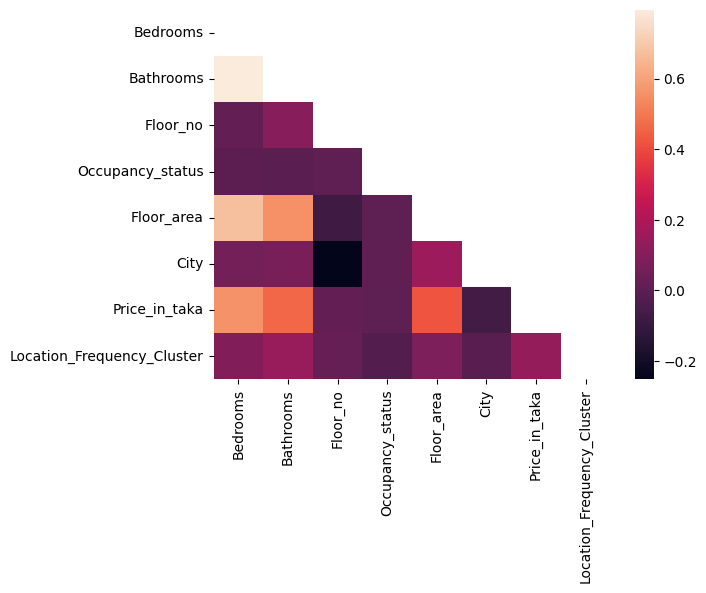

In [381]:
sns.heatmap(data=df_corr, mask=mask)

In [382]:
adjusted_mask = mask[1:, :-1]
adjusted_mask

array([[False,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True],
       [False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False,  True],
       [False, False, False, False, False, False, False]])

In [383]:
adjusted_df_corr = df_corr.iloc[1: , :-1]

<Axes: >

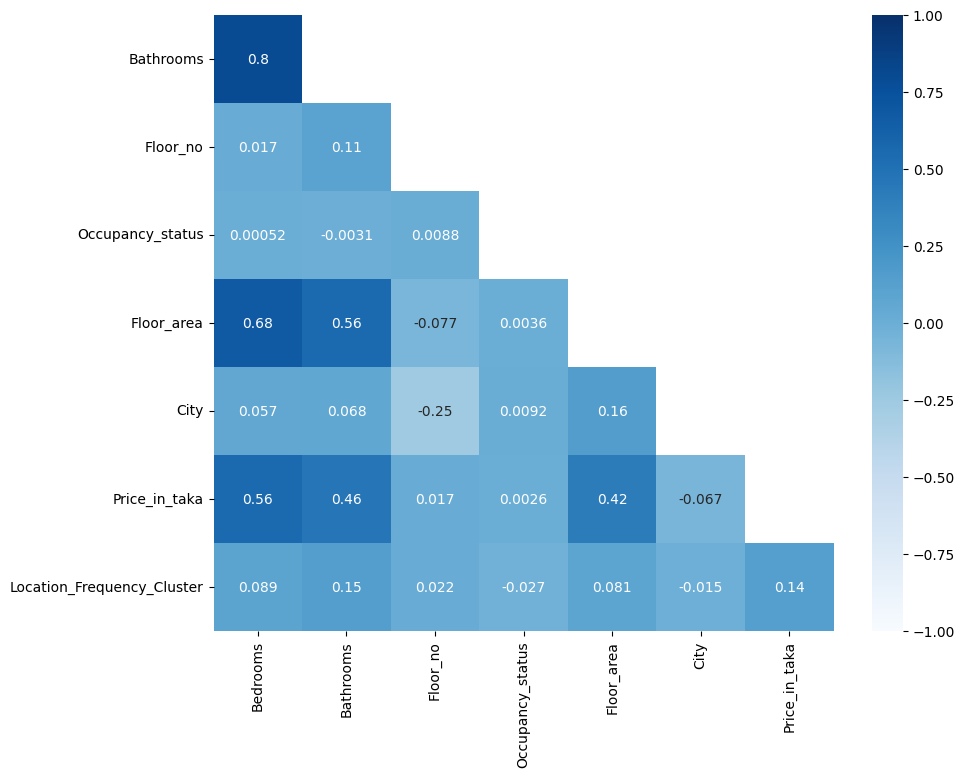

In [384]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(data=adjusted_df_corr, mask=adjusted_mask,
            annot=True, cmap='Blues',
            vmin=-1, vmax=1)

In [385]:
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

import numpy as np

In [386]:
# Chia dữ liệu
feature = ['Price_in_taka','Title','Location']
X = df.drop(feature, axis=1)  # Các đặc trưng độc lập

y = df['Price_in_taka']               # Biến phụ thuộc

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training set size: {X_train.shape[0]} samples')

print(f'Test set size: {X_test.shape[0]} samples')

Training set size: 2048 samples
Test set size: 513 samples


In [387]:
# Khởi tạo mô hình

model = LinearRegression()

# Huấn luyện mô hình

model.fit(X_train, y_train)

LinearRegression()

In [388]:
# Dự đoán trên tập kiểm tra

y_pred = model.predict(X_test)

# Đánh giá mô hình
# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
# Root Mean Squared Error
rmse = np.sqrt(mse)

print(f'Mean Squared Error (MSE): {mse}')

print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Squared Error (MSE): 341384635227254.7
Root Mean Squared Error (RMSE): 18476596.96013459


In [389]:
# R-squared
r_squared = model.score(X_train, y_train)
r_squared

0.2980835597466075

In [390]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])

print(coefficients)

                             Coefficient
Bedrooms                    4.644025e+06
Bathrooms                   1.143499e+06
Floor_no                   -1.558500e+05
Occupancy_status            5.363965e+06
Floor_area                  7.583641e+02
City                       -2.082579e+06
Location_Frequency_Cluster  2.455156e+06


In [391]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2561 entries, 0 to 3862
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Title                       2561 non-null   object
 1   Bedrooms                    2561 non-null   int64 
 2   Bathrooms                   2561 non-null   int64 
 3   Floor_no                    2561 non-null   Int64 
 4   Occupancy_status            2561 non-null   int64 
 5   Floor_area                  2561 non-null   int64 
 6   City                        2561 non-null   int64 
 7   Price_in_taka               2561 non-null   int64 
 8   Location                    2561 non-null   object
 9   Location_Frequency_Cluster  2561 non-null   int64 
dtypes: Int64(1), int64(7), object(2)
memory usage: 222.6+ KB


In [392]:
import numpy as np

# Số giá trị trong X_train

num_rows_X_train = X_train.shape[0]  # Số hàng

# Số giá trị trong y_train

num_values_y_train = y_train.shape[0]  # Số hàng

print(f"Số lượng mẫu trong X_train: {num_rows_X_train}")

print(f"Số lượng mẫu trong y_train: {num_values_y_train}")

Số lượng mẫu trong X_train: 2048
Số lượng mẫu trong y_train: 2048
